# Task
Implement SVM and Logistic Regression from scratch, apply PCA for dimensionality reduction, and compare the performance of these models with and without PCA using the "titanic (1).csv" dataset. Visualize the comparison results and provide a summary of the findings.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/titanic (1).csv')
print("First 5 rows of the DataFrame:")
print(df.head())
print("\nMissing values in each column:")
print(df.isnull().sum())

First 5 rows of the DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

In [ ]:
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std


In [ ]:
def PCA(X, k):
    # covariance matrix
    cov = np.cov(X.T)

    # eigen decomposition
    eig_vals, eig_vecs = np.linalg.eig(cov)

    # sort eigenvectors
    idx = np.argsort(eig_vals)[::-1]
    eig_vecs = eig_vecs[:, idx]

    # choose top k components
    components = eig_vecs[:, :k]

    # project data
    X_reduced = X @ components

    return X_reduced, components


In [ ]:
class LogisticRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n, d = X.shape
        self.w = np.zeros(d)
        self.b = 0

        for _ in range(self.epochs):
            linear = X @ self.w + self.b
            y_pred = self.sigmoid(linear)

            dw = (1/n) * X.T @ (y_pred - y)
            db = np.mean(y_pred - y)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        probs = self.sigmoid(X @ self.w + self.b)
        return (probs > 0.5).astype(int)


In [ ]:
class SVM:
    def __init__(self, lr=0.001, lambda_param=0.01, epochs=1000):
        self.lr = lr
        self.lambda_param = lambda_param
        self.epochs = epochs

    def fit(self, X, y):
        y = np.where(y <= 0, -1, 1)
        n, d = X.shape

        self.w = np.zeros(d)
        self.b = 0

        for _ in range(self.epochs):
            for i, x_i in enumerate(X):
                condition = y[i] * (np.dot(x_i, self.w) - self.b) >= 1

                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w -
                                          np.dot(x_i, y[i]))
                    self.b -= self.lr * y[i]

    def predict(self, X):
        approx = X @ self.w - self.b
        return np.sign(approx)


In [ ]:
X_std = standardize(X)
X_pca, _ = PCA(X_std.values, k=2)


lr_model = LogisticRegression()
lr_model.fit(X_std.values, y.values)
pred_lr = lr_model.predict(X_std.values)

lr_model_pca = LogisticRegression()
lr_model_pca.fit(X_pca, y.values)
pred_lr_pca = lr_model_pca.predict(X_pca)


svm = SVM()
svm.fit(X_std.values, y.values)
pred_svm = svm.predict(X_std.values)

svm_pca = SVM()
svm_pca.fit(X_pca, y.values)
pred_svm_pca = svm_pca.predict(X_pca)

# Results
print("Logistic (no PCA):", accuracy(y.values, pred_lr))
print("Logistic (PCA):", accuracy(y.values, pred_lr_pca))
print("SVM (no PCA):", accuracy(y.values, pred_svm))
print("SVM (PCA):", accuracy(y.values, pred_svm_pca))

NameError: name 'standardize' is not defined

In [ ]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)


In [ ]:
import matplotlib.pyplot as plt

def explained_variance_plot(X):
    cov = np.cov(X.T)
    eig_vals, _ = np.linalg.eig(cov)

    eig_vals = np.sort(eig_vals)[::-1]
    variance_ratio = eig_vals / np.sum(eig_vals)

    plt.plot(np.cumsum(variance_ratio), marker='o')
    plt.xlabel("Number of Components")
    plt.ylabel("Cumulative Explained Variance")
    plt.title("Explained Variance by PCA")
    plt.show()



Plotting PCA reduced data:


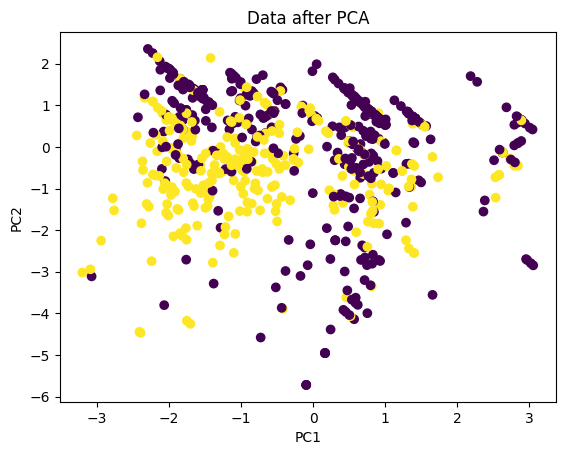


Plotting Explained Variance:


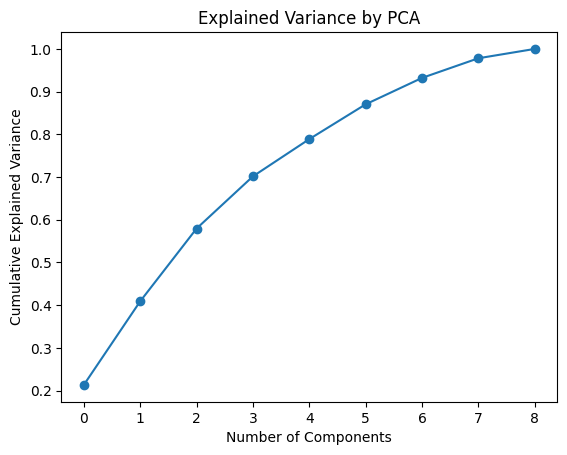

In [ ]:
def plot_pca(X_pca, y):
    plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Data after PCA")
    plt.show()

# Call the plot_pca function with the X_pca and y data
print("\nPlotting PCA reduced data:")
plot_pca(X_pca, y.values)

# Call the explained_variance_plot function with the standardized data
print("\nPlotting Explained Variance:")
explained_variance_plot(X_std.values)